# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Load data

In [2]:
tourism_path = '../data/raw/tourism_with_id.csv'
user_path = '../data/raw/user.csv'
rating_path = '../data/raw/tourism_rating.csv'

# Pra Proses Data & Eksplorasi Dataset

## Data Objek Wisata

In [3]:
# Load data objek wisata
data_tourism_with_id = pd.read_csv(tourism_path)

data_tourism_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [4]:
# Menampilkan contoh data objek wisata
data_tourism_with_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [5]:
# Drop kolom yang tidak digunakan, yaitu harga, rating, waktu, koordinat, dan kolom kosong
data_tourism_with_id.drop(['Price','Rating','Time_Minutes','Coordinate','Lat','Long','Unnamed: 11','Unnamed: 12'],axis=1,inplace=True)
data_tourism_with_id

,Place_Id,Place_Name,Description,Category,City
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta
...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya


In [6]:
# Memeriksa nama objek wisata yang duplikat
check_duplicate_name = data_tourism_with_id['Place_Name'].duplicated().value_counts()
check_duplicate_name

Place_Name
False    437
Name: count, dtype: int64

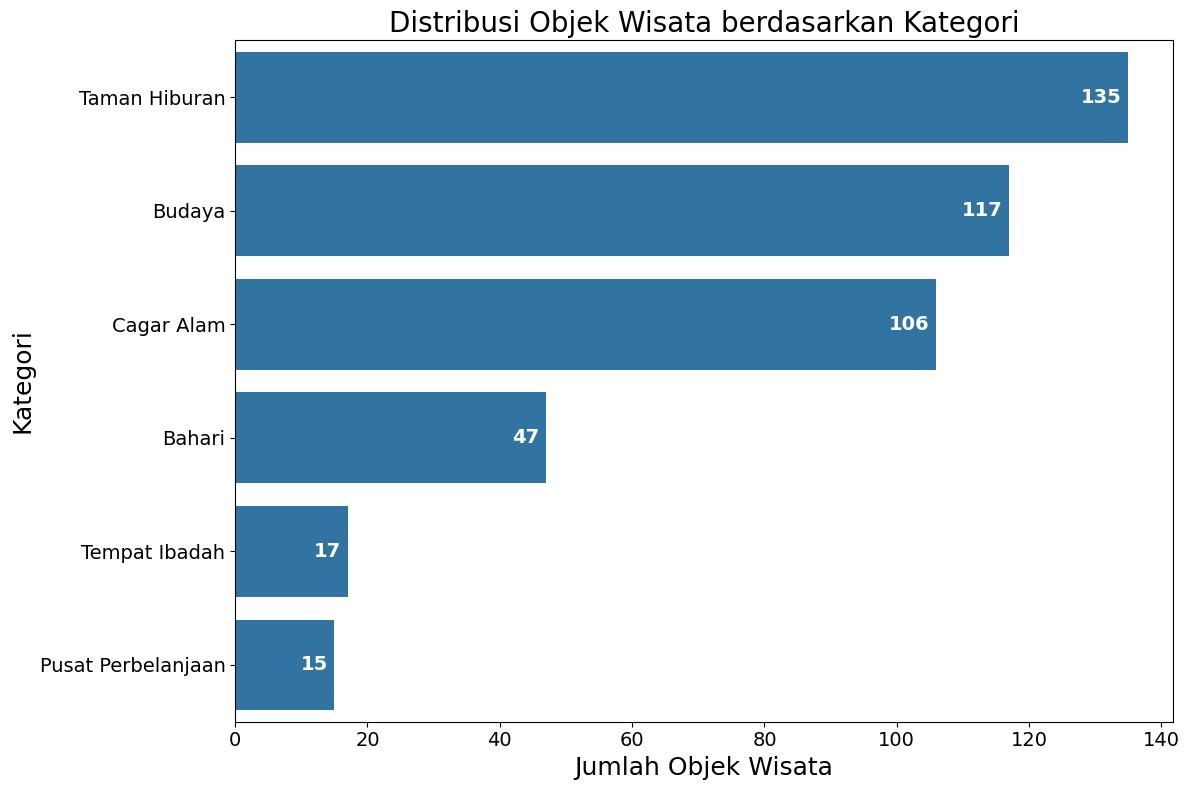

In [7]:
# Menampilkan Distribusi Objek Wisata berdasarkan Kategori
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    y='Category',
    data=data_tourism_with_id,
    order=data_tourism_with_id['Category'].value_counts().index
)

# Menambahkan label jumlah di dalam batang
for bar in ax.patches:
    width = bar.get_width()
    if width > 0:
        ax.text(
            width - 1,                      # posisikan di dalam batang
            bar.get_y() + bar.get_height()/2,
            int(width),
            ha='right', va='center',
            color='white', fontsize=14, fontweight='bold'
        )

# Judul dan label dengan font besar
plt.title('Distribusi Objek Wisata berdasarkan Kategori', fontsize=20)
plt.xlabel('Jumlah Objek Wisata', fontsize=18)
plt.ylabel('Kategori', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

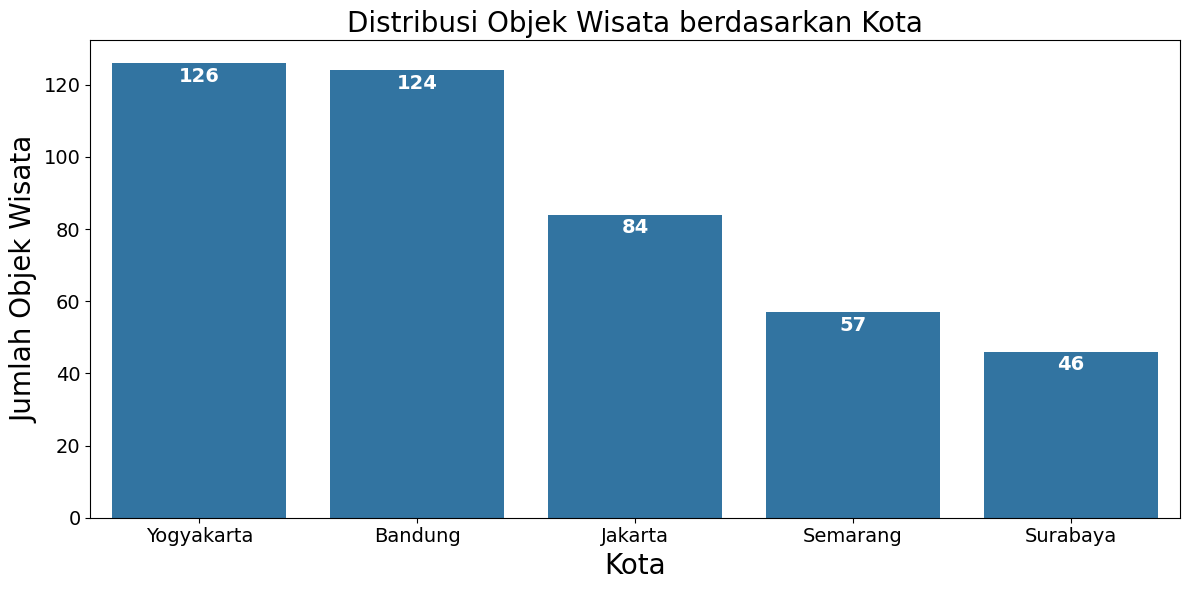

In [8]:
# Menampilkan Distribusi Objek Wisata berdasarkan Kota
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x='City',
    data=data_tourism_with_id,
    order=data_tourism_with_id['City'].value_counts().index
)

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width() / 2,
                height - 1,  # Sedikit di bawah tinggi batang
                int(height),
                ha='center', va='top', color='white', fontsize=14, fontweight='bold')

plt.title('Distribusi Objek Wisata berdasarkan Kota', fontsize=20)
plt.xlabel('Kota', fontsize=20)
plt.ylabel('Jumlah Objek Wisata', fontsize=20)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

In [9]:
# Jumlah kategori wisata untuk setiap kota
category_counts = data_tourism_with_id.groupby(['City', 'Category']).size().unstack(fill_value=0)
category_counts

Category,Bahari,Budaya,Cagar Alam,Pusat Perbelanjaan,Taman Hiburan,Tempat Ibadah
City,,,,,,
Bandung,0,22,54,1,39,8
Jakarta,8,32,4,10,27,3
Semarang,4,15,20,0,15,3
Surabaya,1,18,5,1,18,3
Yogyakarta,34,30,23,3,36,0


<Figure size 1400x800 with 0 Axes>

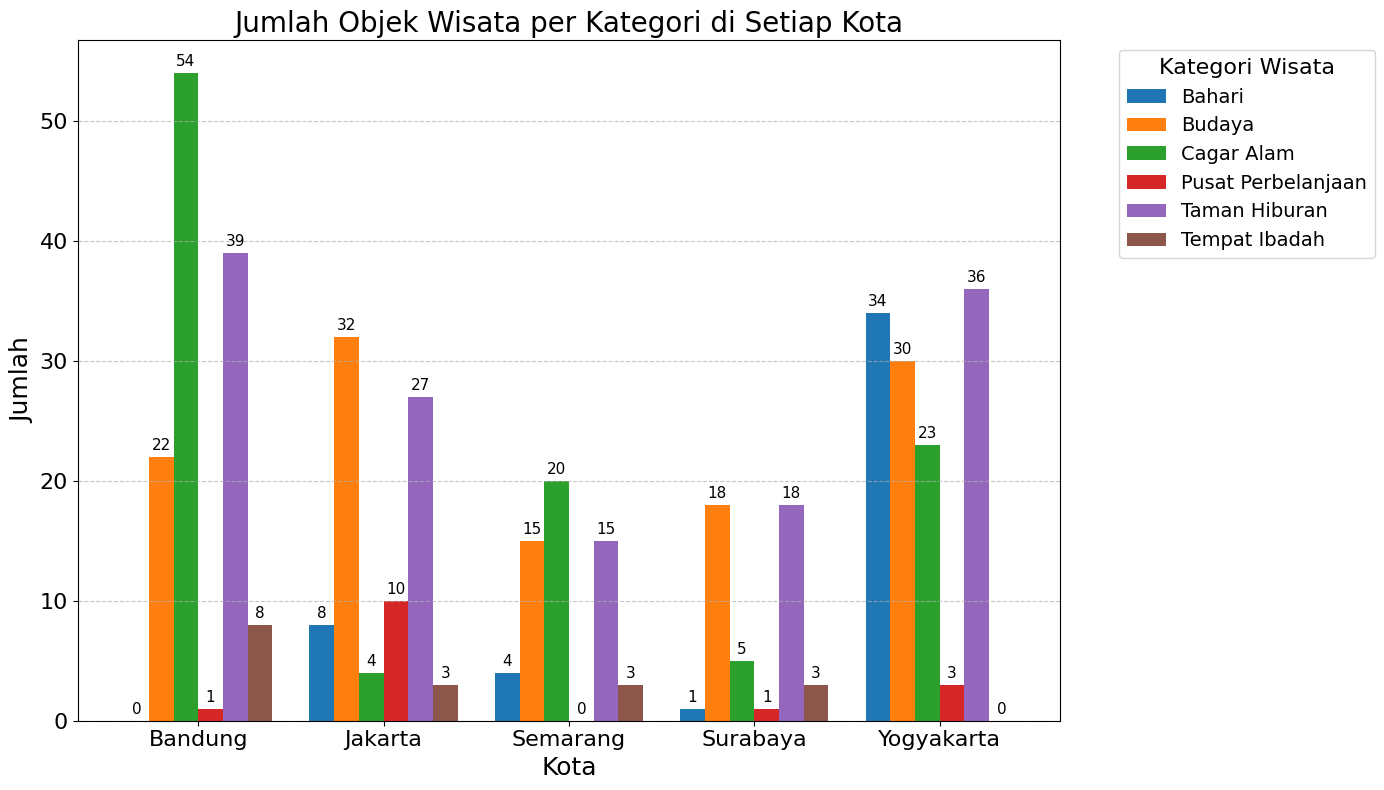

In [10]:
# Visualisasi jumlah kategori wisata untuk setiap kota
plt.figure(figsize=(14, 8))
ax = category_counts.plot(kind='bar', figsize=(14, 8), width=0.8)

# Tambahkan label angka di atas masing-masing batang
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=11, padding=3)

# Judul dan label sumbu
plt.title('Jumlah Objek Wisata per Kategori di Setiap Kota', fontsize=20)
plt.xlabel('Kota', fontsize=18)
plt.ylabel('Jumlah', fontsize=18)

# Ukuran dan rotasi label sumbu x dan y
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)

# Legenda
plt.legend(title='Kategori Wisata', title_fontsize=16, fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Data User

In [11]:
# Load data user
df_users = pd.read_csv(user_path)

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [12]:
# Menampilkan contoh data user
df_users.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [13]:
# Drop kolom yang tidak digunakan, yaitu lokasi user
df_users.drop(['Location'],axis=1,inplace=True)
# Menampilkan data user setelah drop kolom  
df_users

,User_Id,Age
0,1,20
1,2,21
2,3,23
3,4,21
4,5,20
...,...,...
295,296,31
296,297,39
297,298,38
298,299,27


In [14]:
# Menambahkan kolom "Gender" untuk data user dengan proporsi 50:50, Laki-laki: Perempuan
np.random.seed(42)  # Set seed untuk reproducibility
df_users['Gender'] = np.random.choice(['Laki-laki', 'Perempuan'], size=len(df_users), p=[0.5, 0.5])
df_users.inplace = True
df_users

,User_Id,Age,Gender
0,1,20,Laki-laki
1,2,21,Perempuan
2,3,23,Perempuan
3,4,21,Perempuan
4,5,20,Laki-laki
...,...,...,...
295,296,31,Perempuan
296,297,39,Perempuan
297,298,38,Laki-laki
298,299,27,Perempuan


In [15]:
# Jumlah user berdasarkan jenis kelamin (Gender)
gender_counts = df_users['Gender'].value_counts()
gender_counts

Gender
Perempuan    156
Laki-laki    144
Name: count, dtype: int64

In [16]:
# Menambahkan kolom Age_Group
def get_age_group(age):
    if 18 <= age <= 22:
        return 'Teen/College'
    elif 23 <= age <= 27:
        return 'Young Adult'
    elif 28 <= age <= 32:
        return 'Adult'
    else:
        return 'Mature Adult'

df_users['Age_Group'] = df_users['Age'].apply(get_age_group)

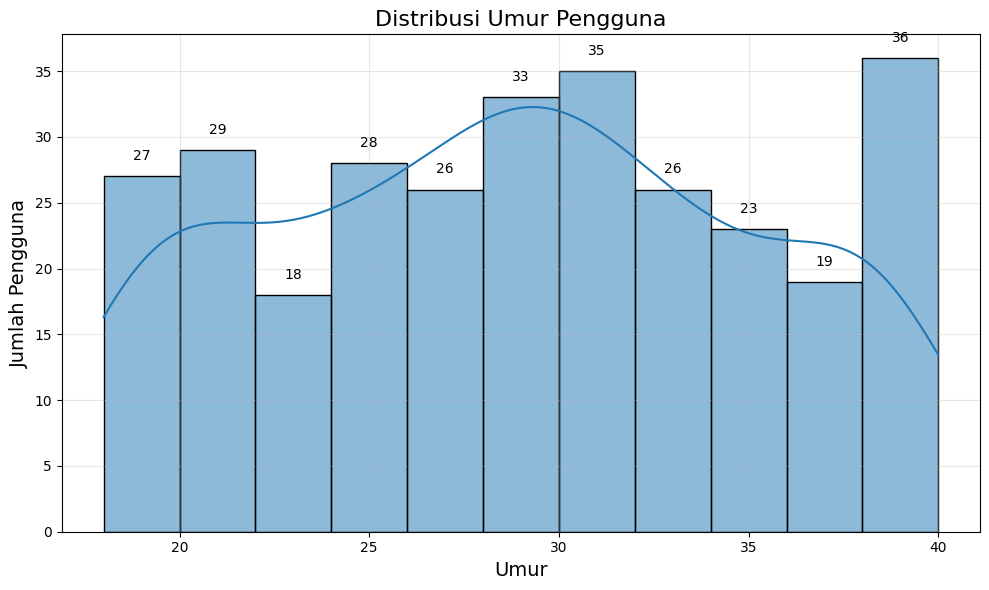

In [55]:
# Membuat histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df_users, x='Age', bins=11, kde=True)

# Menambahkan angka di atas batang
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        # Menempatkan angka di tengah batang secara horizontal, dan sedikit di atas secara vertikal
        ax.text(patch.get_x() + patch.get_width() / 2, height + 1,
                int(height), ha='center', va='bottom', fontsize=10)

# Label dan judul
plt.title('Distribusi Umur Pengguna', fontsize=16)
plt.xlabel('Umur', fontsize=14)
plt.ylabel('Jumlah Pengguna', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [18]:
# Jumlah user berdasarkan Age Group
age_group_counts = df_users['Age_Group'].value_counts()
age_group_counts

Age_Group
Mature Adult    90
Adult           82
Young Adult     65
Teen/College    63
Name: count, dtype: int64

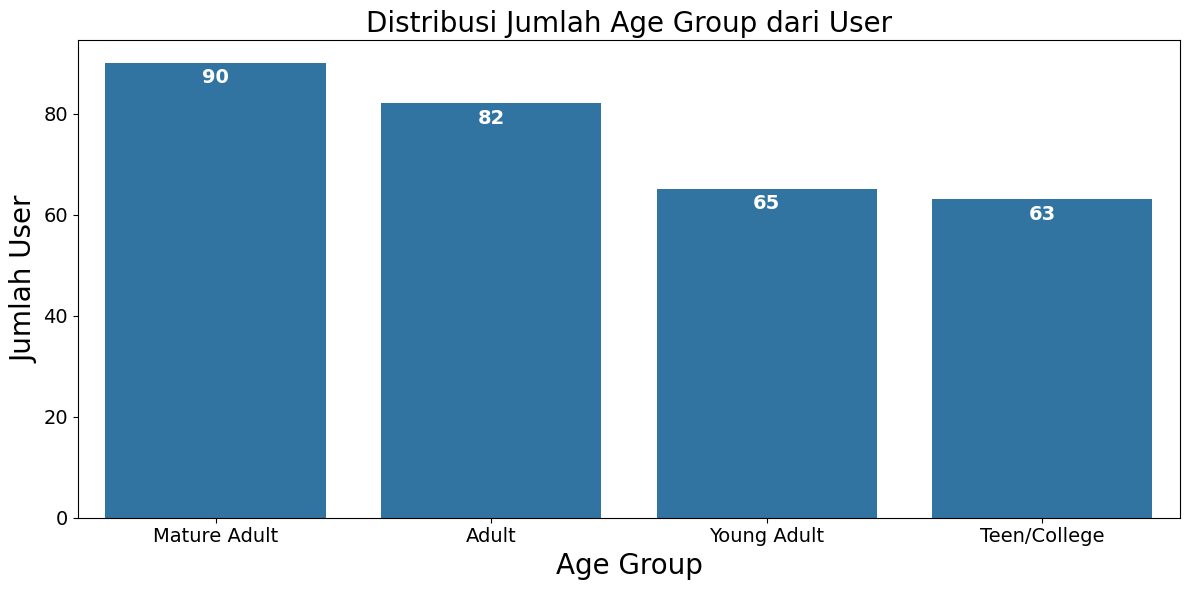

In [19]:
# Menampilkan Jumlah Age Group dari User
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x='Age_Group',
    data=df_users,
    order=df_users['Age_Group'].value_counts().index
)

# Tambahkan label angka di dalam batang
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            height - 1,
            int(height),
            ha='center', va='top', color='white', fontsize=14, fontweight='bold'
        )

# Judul dan label sumbu dengan ukuran font besar
plt.title('Distribusi Jumlah Age Group dari User', fontsize=20)
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('Jumlah User', fontsize=20)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


## Data Rating dari User

In [20]:
# Load data rating
df_ratings = pd.read_csv(rating_path)

df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [21]:
# Menampilkan contoh data rating
df_ratings.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [22]:
# Men-generate kolom Tipe Perjalanan untuk data rating
np.random.seed(42)  # Set seed untuk reproducibility
df_ratings['Tipe_Perjalanan'] = np.random.choice(['Friends Trip', 'Family Trip', 'Couple Trip', 'Solo Trip'], size=len(df_ratings), p=[0.35, 0.30, 0.25, 0.10])
df_ratings

,User_Id,Place_Id,Place_Ratings,Tipe_Perjalanan
0,1,179,3,Family Trip
1,1,344,2,Solo Trip
2,1,5,5,Couple Trip
3,1,373,3,Family Trip
4,1,101,4,Friends Trip
...,...,...,...,...
9995,300,425,2,Couple Trip
9996,300,64,4,Couple Trip
9997,300,311,3,Solo Trip
9998,300,279,4,Family Trip


In [23]:
# Menganalisis baris yang duplikat
# Menghitung jumlah kemunculan setiap kombinasi
combination_counts = df_ratings.groupby(['User_Id', 'Place_Id', 'Tipe_Perjalanan']).size().reset_index(name='count')

# Menampilkan kombinasi yang muncul lebih dari sekali (duplikat)
duplicated_combinations = combination_counts[combination_counts['count'] > 1]
print(f"Jumlah kombinasi duplikat: {len(duplicated_combinations)}")
print(duplicated_combinations.head())

# Total duplikat User_Id dengan Place_Id yang sama
check_duplicate = df_ratings.duplicated(subset=['User_Id', 'Place_Id', 'Tipe_Perjalanan']).sum()
print(f"Jumlah baris duplikat: {check_duplicate}")

Jumlah kombinasi duplikat: 117
     User_Id  Place_Id Tipe_Perjalanan  count
149        6        64    Friends Trip      2
223        8       306     Couple Trip      2
372       13       398    Friends Trip      2
687       23        60    Friends Trip      2
946       30       323    Friends Trip      2
Jumlah baris duplikat: 118


Baris duplikat di atas diasumsikan merupakan history user yang melakukan perjalanan berulang, sehingga baris tersebut tidak dihapus dan tetap dimasukkan sebagai dataset.

In [24]:
# Menghitung distribusi jumlah rating
rating_counts = df_ratings['Place_Ratings'].value_counts().sort_index()
rating_counts

Place_Ratings
1    1706
2    2071
3    2096
4    2106
5    2021
Name: count, dtype: int64

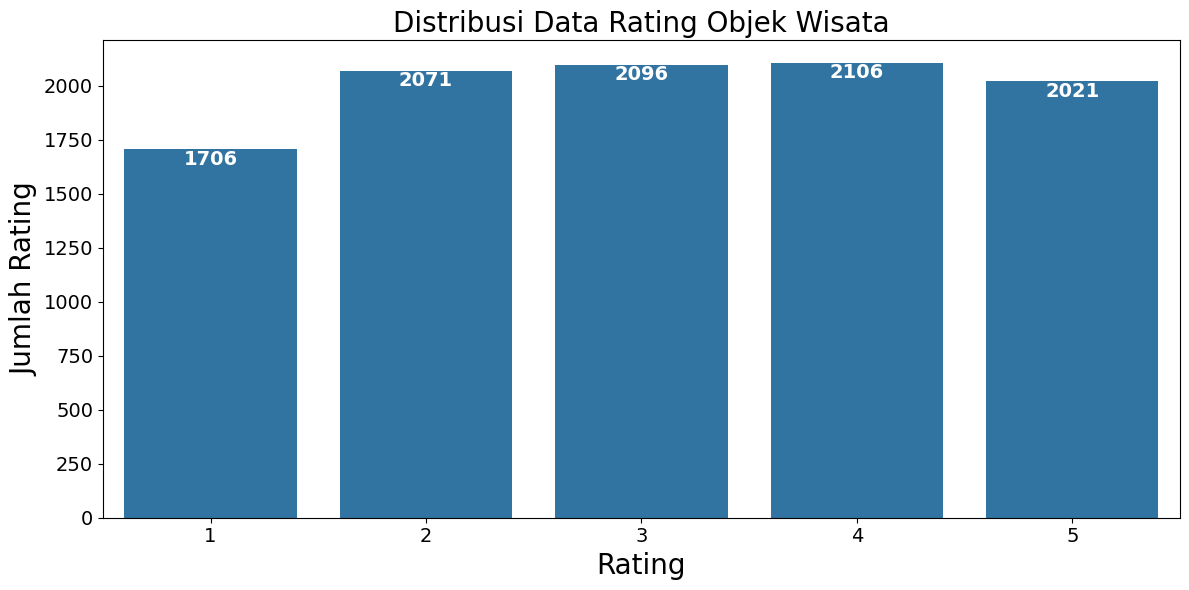

In [25]:
# Visualisasi distribusi rating
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Place_Ratings', data=df_ratings)

# Menambahkan label angka di dalam batang
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width() / 2,
                height - 1,
                int(height),
                ha='center', va='top',
                color='white', fontsize=14, fontweight='bold')

# Judul dan label sumbu
plt.title('Distribusi Data Rating Objek Wisata', fontsize=20)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Jumlah Rating', fontsize=20)

# Ukuran font pada ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

In [26]:
# Menghitung distribusi jumlah tipe perjalanan
tipe_perjalanan_counts = df_ratings['Tipe_Perjalanan'].value_counts()
tipe_perjalanan_counts

Tipe_Perjalanan
Friends Trip    3555
Family Trip     3048
Couple Trip     2436
Solo Trip        961
Name: count, dtype: int64

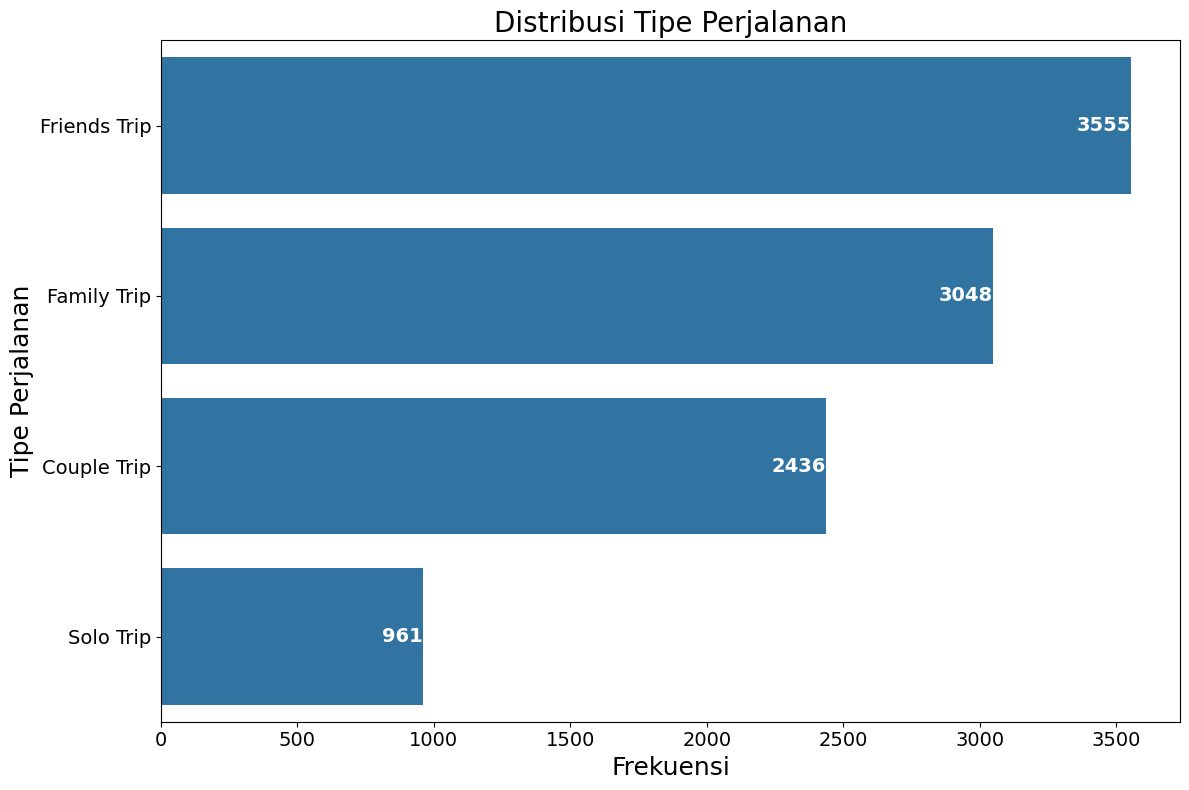

In [27]:
# Visualisasi distribusi jumlah tipe perjalanan
plt.figure(figsize=(12, 8))
ax = sns.countplot(
    y='Tipe_Perjalanan',
    data=df_ratings,
    order=df_ratings['Tipe_Perjalanan'].value_counts().index
)

# Menambahkan label angka di dalam batang horizontal
for bar in ax.patches:
    width = bar.get_width()
    if width > 0:
        ax.text(width - 1,                     # Geser ke kiri sedikit agar masuk batang
                bar.get_y() + bar.get_height() / 2,
                int(width),
                ha='right', va='center',
                color='white', fontsize=14, fontweight='bold')

# Judul dan label sumbu
plt.title('Distribusi Tipe Perjalanan', fontsize=20)
plt.xlabel('Frekuensi', fontsize=18)
plt.ylabel('Tipe Perjalanan', fontsize=18)

# Ukuran font untuk ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

## Membuat tabel data gabungan

In [38]:
# Menggabungkan rating dengan data tempat wisata
ratings_with_places = pd.merge(
    df_ratings, 
    data_tourism_with_id[['Place_Id', 'Place_Name', 'Category','City']], 
    on='Place_Id', 
    how='left'
)

# Merge dengan df_users
full_data = pd.merge(
    ratings_with_places, 
    df_users.rename(columns={'Location': 'User Location'}), 
    on='User_Id', 
    how='left'
)

full_data

,User_Id,Place_Id,Place_Ratings,Tipe_Perjalanan,Place_Name,Category,City,Age,Gender,Age_Group
0,1,179,3,Family Trip,Candi Ratu Boko,Budaya,Yogyakarta,20,Laki-laki,Teen/College
1,1,344,2,Solo Trip,Pantai Marina,Bahari,Semarang,20,Laki-laki,Teen/College
2,1,5,5,Couple Trip,Atlantis Water Adventure,Taman Hiburan,Jakarta,20,Laki-laki,Teen/College
3,1,373,3,Family Trip,Museum Kereta Ambarawa,Budaya,Semarang,20,Laki-laki,Teen/College
4,1,101,4,Friends Trip,Kampung Wisata Sosro Menduran,Budaya,Yogyakarta,20,Laki-laki,Teen/College
...,...,...,...,...,...,...,...,...,...,...
9995,300,425,2,Couple Trip,Waterpark Kenjeran Surabaya,Taman Hiburan,Surabaya,26,Laki-laki,Young Adult
9996,300,64,4,Couple Trip,Museum Sasmita Loka Ahmad Yani,Budaya,Jakarta,26,Laki-laki,Young Adult
9997,300,311,3,Solo Trip,The Lodge Maribaya,Cagar Alam,Bandung,26,Laki-laki,Young Adult
9998,300,279,4,Family Trip,Masjid Agung Trans Studio Bandung,Tempat Ibadah,Bandung,26,Laki-laki,Young Adult


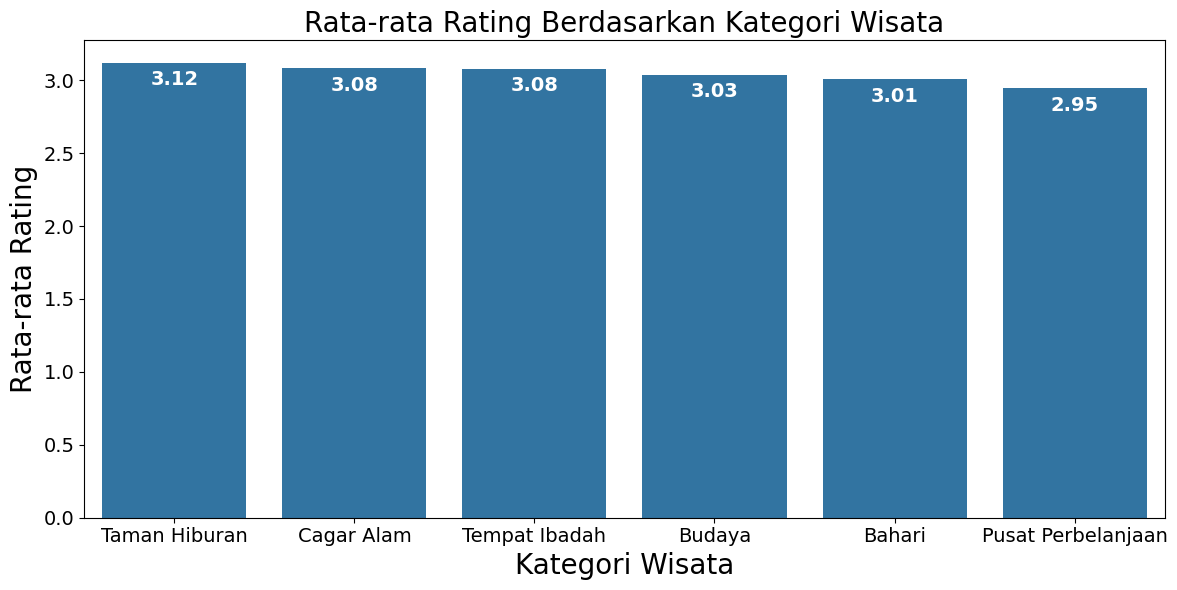

In [29]:
# Hitung rata-rata rating per kategori
avg_rating = full_data.groupby('Category')['Place_Ratings'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_rating.index, y=avg_rating.values)

# Menambahkan label angka di atas batang
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2,
            height - 0.05,
            f'{height:.2f}',
            ha='center', va='top',
            color='white', fontsize=14, fontweight='bold')

# Judul dan label sumbu
plt.title('Rata-rata Rating Berdasarkan Kategori Wisata', fontsize=20)
plt.xlabel('Kategori Wisata', fontsize=20)
plt.ylabel('Rata-rata Rating', fontsize=20)

# Ukuran font pada ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

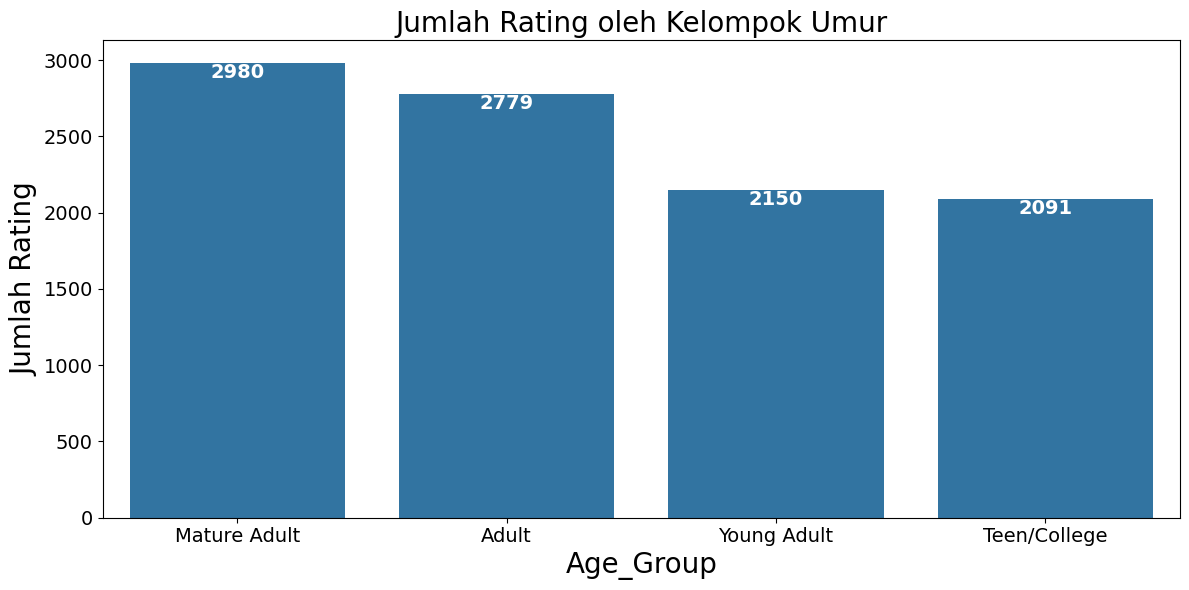

In [65]:
# Melihat jumlah rating yang diberikan berdasarkan kelompok umur
avg_rating = full_data.groupby('Age_Group')['Place_Ratings'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_rating.index, y=avg_rating.values)

# Menambahkan label angka di atas batang
for patch in ax.patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2,
            height - 0.05,
            f'{height:.0f}',
            ha='center', va='top',
            color='white', fontsize=14, fontweight='bold')

# Judul dan label sumbu
plt.title('Jumlah Rating oleh Kelompok Umur', fontsize=20)
plt.xlabel('Age_Group', fontsize=20)
plt.ylabel('Jumlah Rating', fontsize=20)

# Ukuran font pada ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

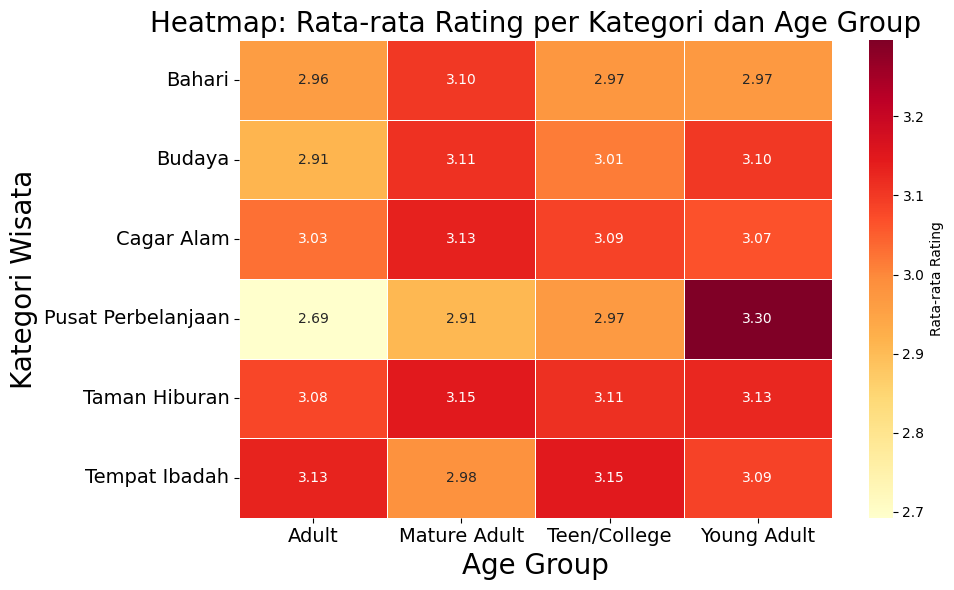

In [ ]:
# Heatmap rata-rata rating per kategori dan age group
pivot_rating = full_data.groupby(['Category', 'Age_Group'])['Place_Ratings'].mean().unstack()

plt.figure(figsize=(10, 6))
ax = sns.heatmap(pivot_rating, annot=True, fmt='.2f', cmap='YlOrRd', 
                 cbar_kws={'label': 'Rata-rata Rating'}, linewidths=0.5)

plt.title('Heatmap: Rata-rata Rating per Kategori dan Age Group', fontsize=20)
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('Kategori Wisata', fontsize=20)

# Ukuran font pada ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)

plt.tight_layout()
plt.show()

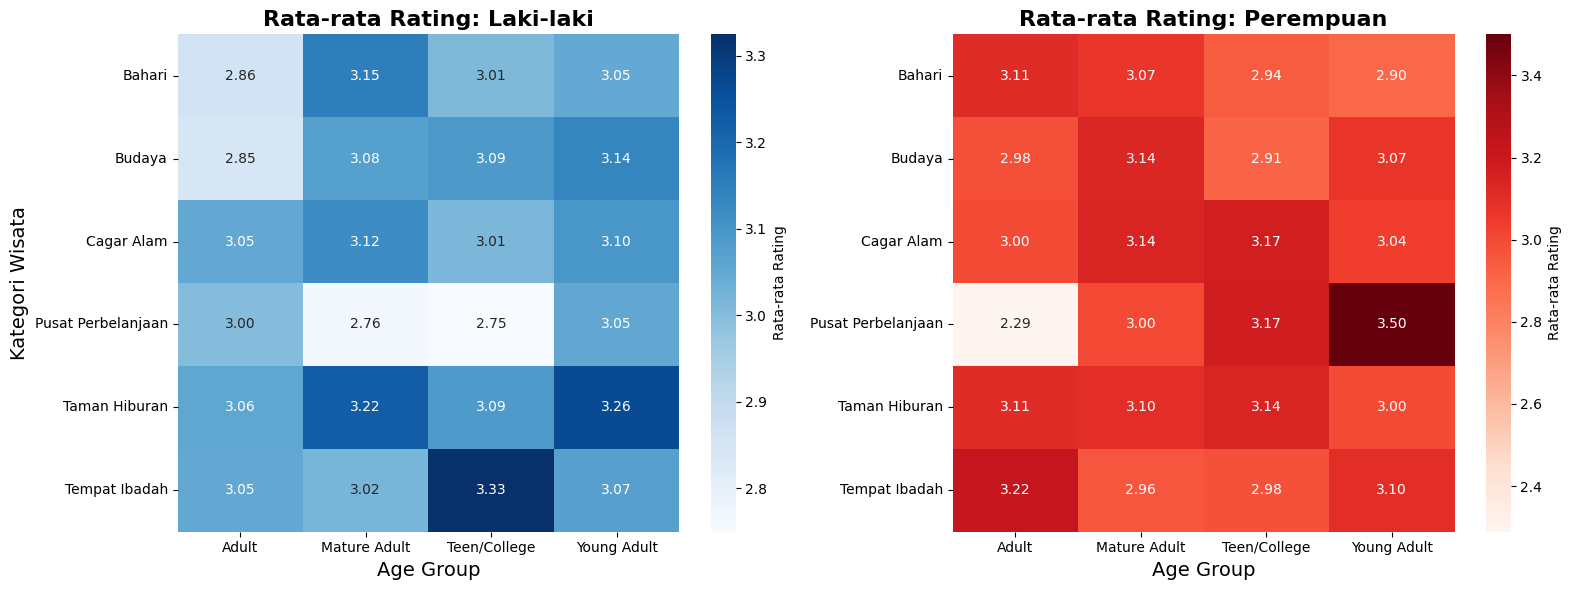

In [ ]:
# HEATMAP RATA-RATA RATING PER KATEGORI, AGE GROUP, DAN GENDER

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap untuk Laki-laki
male_data = full_data[full_data['Gender'] == 'Laki-laki']
male_pivot = male_data.groupby(['Category', 'Age_Group'])['Place_Ratings'].mean().unstack()

sns.heatmap(male_pivot, annot=True, fmt='.2f', cmap='Blues', 
            ax=axes[0], cbar_kws={'label': 'Rata-rata Rating'})
axes[0].set_title('Rata-rata Rating: Laki-laki', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Age Group', fontsize=14)
axes[0].set_ylabel('Kategori Wisata', fontsize=14)

# Heatmap untuk Perempuan
female_data = full_data[full_data['Gender'] == 'Perempuan']
female_pivot = female_data.groupby(['Category', 'Age_Group'])['Place_Ratings'].mean().unstack()

sns.heatmap(female_pivot, annot=True, fmt='.2f', cmap='Reds', 
            ax=axes[1], cbar_kws={'label': 'Rata-rata Rating'})
axes[1].set_title('Rata-rata Rating: Perempuan', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Age Group', fontsize=14)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Analisis Preferensi Pengunjung terhadap Suatu Kategori Wisata

In [39]:
# Filter data dengan rating tinggi (yaitu rating >= 4)
df_filteredrating = full_data[full_data['Place_Ratings'] >= 4]

df_filteredrating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4127 entries, 2 to 9998
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_Id          4127 non-null   int64 
 1   Place_Id         4127 non-null   int64 
 2   Place_Ratings    4127 non-null   int64 
 3   Tipe_Perjalanan  4127 non-null   object
 4   Place_Name       4127 non-null   object
 5   Category         4127 non-null   object
 6   City             4127 non-null   object
 7   Age              4127 non-null   int64 
 8   Gender           4127 non-null   object
 9   Age_Group        4127 non-null   object
dtypes: int64(4), object(6)
memory usage: 354.7+ KB


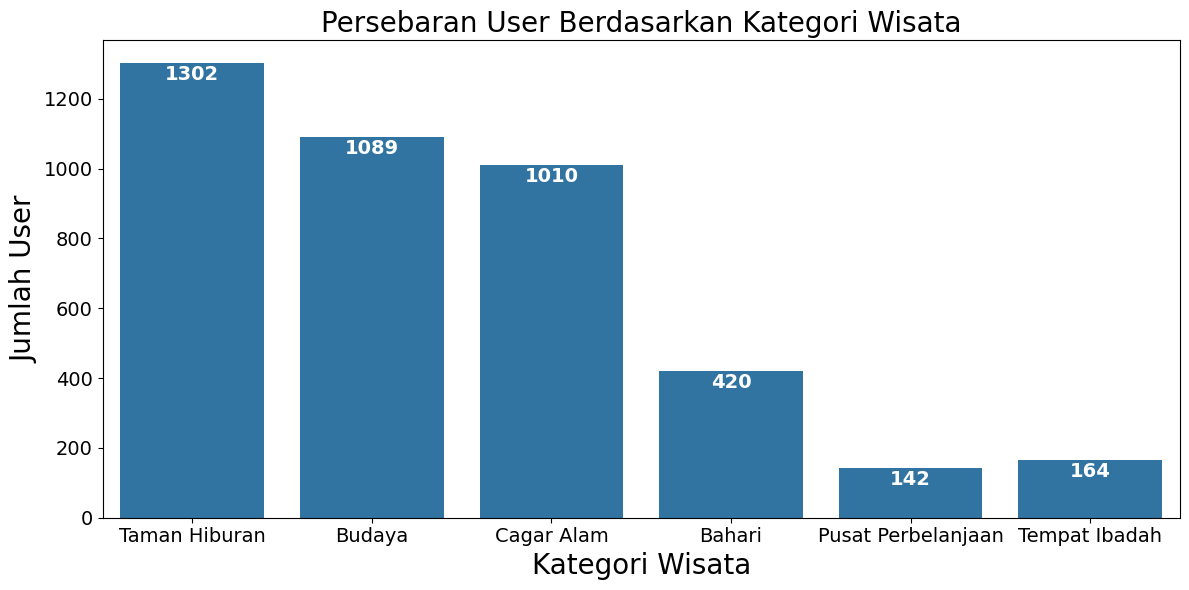

In [50]:
# Jumlah user yang memberikan rating tinggi berdasarkan kategori wisata
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Category', data=df_filteredrating, order=full_data['Category'].value_counts().index)

# Menambahkan label angka di atas batang
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(patch.get_x() + patch.get_width() / 2,
                height - 5,
                int(height),
                ha='center', va='top',
                color='white', fontsize=14, fontweight='bold')

# Judul dan label sumbu
plt.title('Persebaran User Berdasarkan Kategori Wisata', fontsize=20)
plt.xlabel('Kategori Wisata', fontsize=20)
plt.ylabel('Jumlah User', fontsize=20)

# Ukuran font pada ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

In [52]:
# Analisis ciri-ciri user per kategori wisata berdasarkan demografi user (age group dan gender)
rules_data = df_filteredrating.groupby(
    ['Gender', 'Age_Group','Category']
).agg({
    'User_Id': 'count'
}).reset_index().rename(columns={'User_Id': 'Total_Users'})

# Sort berdasarkan Total_Users
rules_data = rules_data.sort_values(by=['Category', 'Total_Users'], ascending=[True, False]).reset_index(drop=True)
rules_data

,Gender,Age_Group,Category,Total_Users
0,Perempuan,Mature Adult,Bahari,77
1,Laki-laki,Adult,Bahari,69
2,Laki-laki,Mature Adult,Bahari,58
3,Perempuan,Adult,Bahari,53
4,Perempuan,Teen/College,Bahari,46
5,Perempuan,Young Adult,Bahari,41
6,Laki-laki,Teen/College,Bahari,38
7,Laki-laki,Young Adult,Bahari,38
8,Perempuan,Mature Adult,Budaya,197
9,Perempuan,Adult,Budaya,149


# Membuat model untuk menghitung similarity

In [45]:
# Buat dan fit encoder
encoder = OneHotEncoder()
encoder.fit(rules_data[['Gender', 'Age_Group']])

# Save encoder ke folder 'models'
with open('../models/encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# Menyimpan data yang sudah diproses

In [53]:
# Simpan data yang sudah diproses untuk digunakan dalam aplikasi web
data_tourism_with_id.to_csv('../data/processed/tourism_processed.csv', index=False)
rules_data.to_csv('../data/processed/rules_data.csv', index=False)

print("Data berhasil diproses dan disimpan!")
print(f"Total objek wisata: {len(data_tourism_with_id)}")
print(f"Total rules: {len(rules_data)}")

Data berhasil diproses dan disimpan!
Total objek wisata: 437
Total rules: 48
